### Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

### In business-to-consumer marketing, companies often segment customers according to demographics that include: Age,Gender,Marital status,Location (urban, suburban, rural),Life stage (single, married, divorced, empty-nester, retired, etc.),Income.

### Segmentation allows marketers to better tailor their marketing efforts to various audience subsets.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.25)
from IPython.core.display import HTML, display
import scipy.stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Importing Data

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Basic EDA

In [3]:
rows, columns = df.shape[0], df.shape[1]
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px;'>Inference </b>:<ul><li>There are {rows} rows and {columns} columns.</li></ul></h3>"))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns={'Annual Income (k$)':"Annual_Income", 
                   'Spending Score (1-100)': "Score"}, inplace=True)

In [6]:
nan_values = df.isna().sum().sum()
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px;'>Inference </b>:<ul><li>There are {nan_values} nan values.</li></ul></h3>"))

In [7]:
duplicates = df.duplicated().sum()
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px;'>Inference </b>:<ul><li>There are {duplicates} duplicate values.</li></ul></h3>"))

In [8]:
df.describe()

,CustomerID,Age,Annual_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px;'>Inference from 5 number theory: </b></h3><h4><ul><li>Age is Right skewed.</li><li>Annual Income is Roughly Normally Distributed.</li><li>Spending score is also Roughly Normally Distributed.</li></ul></h4>"))

## Univariate Analysis

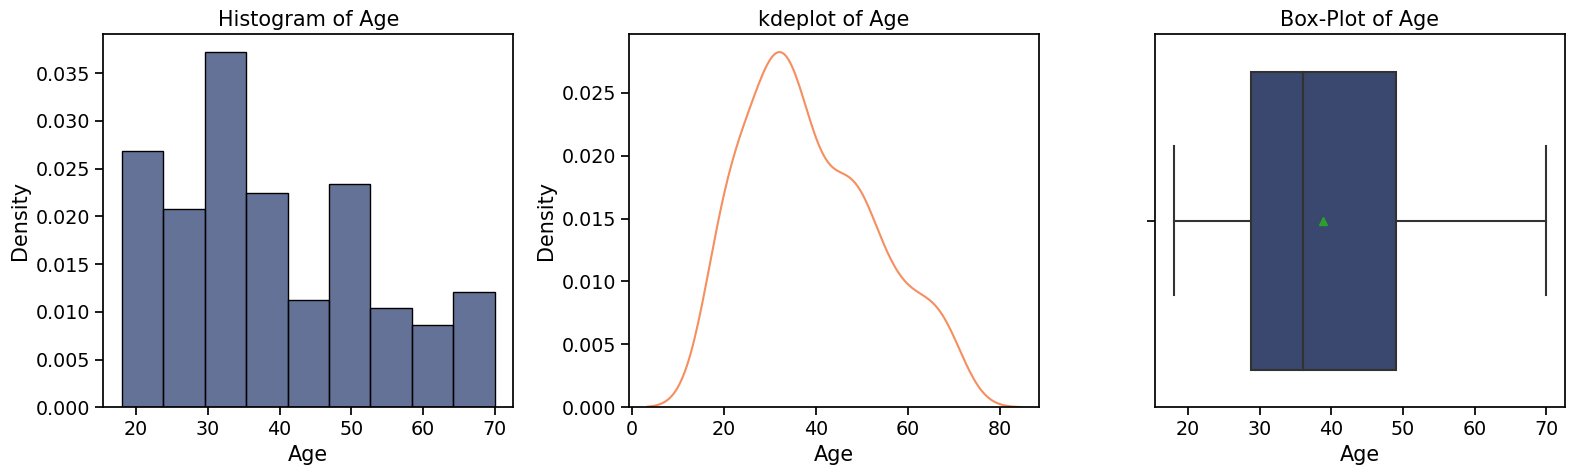

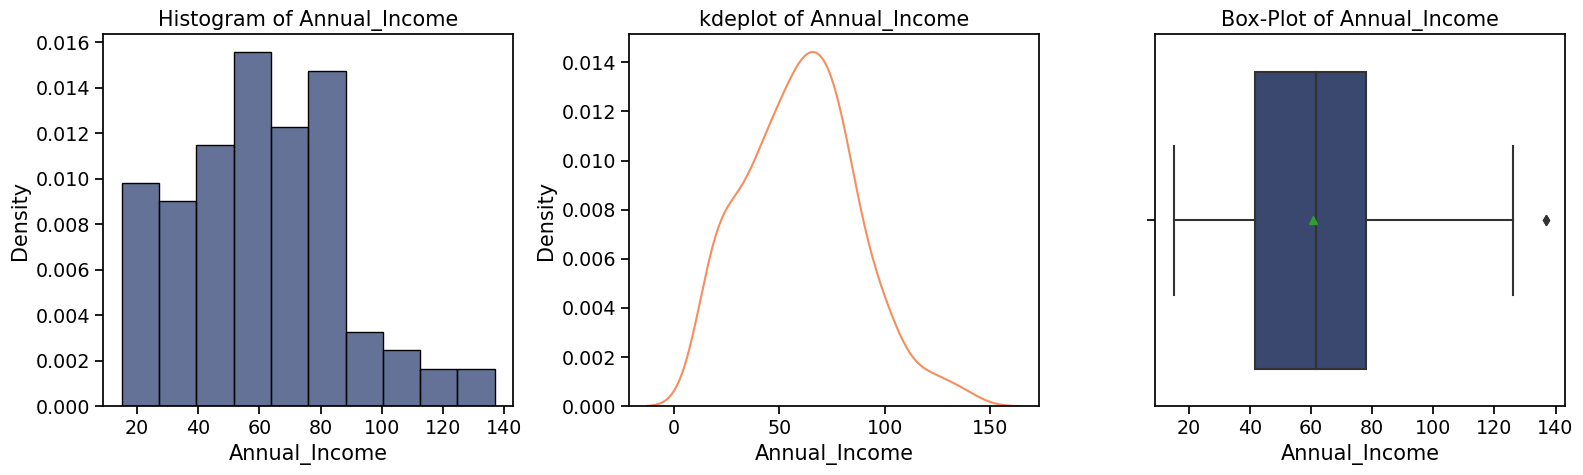

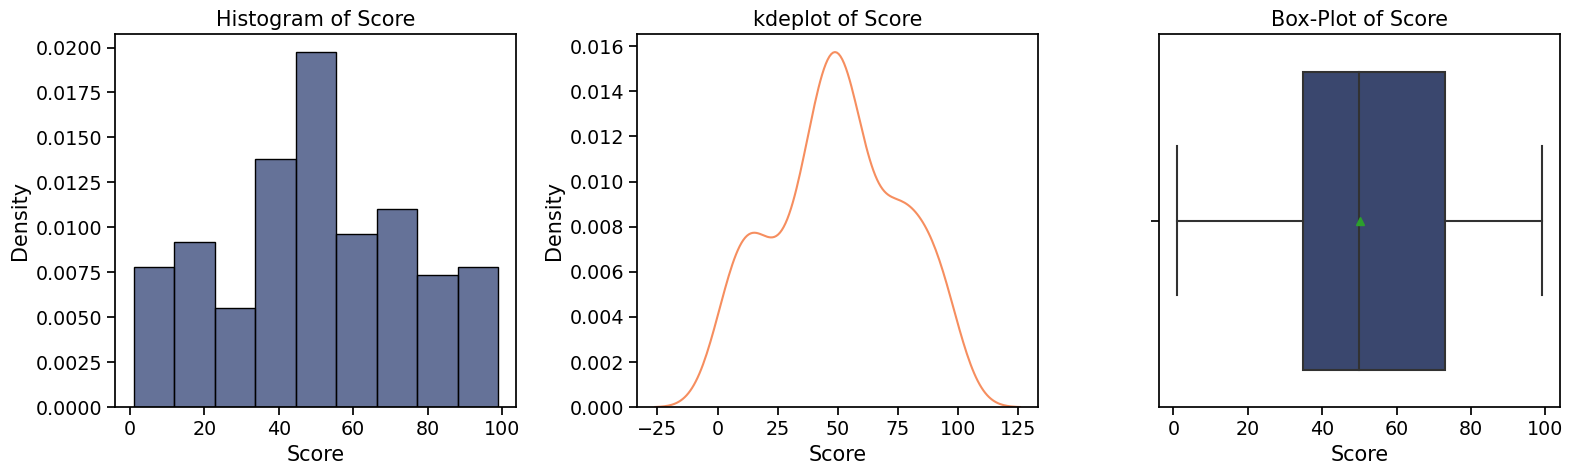

In [10]:
cols = ['Age', 'Annual_Income', 'Score']
for i, col in enumerate(cols):
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:#586ba4'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    plt.subplot(1,3,1)
    sns.histplot(data=df, x=col, stat='density', bins=bins, color='#324376')
    plt.title(f'Histogram of {col}', size=15)
                 
    plt.subplot(1,3,2)
    sns.kdeplot(data=df,x=col,color='#f68e5f')
    plt.title(f'kdeplot of {col}',size=15)
              
    plt.subplot(1,3,3)
    sns.boxplot(data=df, x=col, color='#324376', showmeans=True)
    plt.title(f'Box-Plot of {col}', size=15)
    plt.tight_layout()
    plt.show()

In [11]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px;'>Inference: </b></h3><h4><ul><li>The kde plot is generated by using our data as sample of a bigger population therefore it gives a more generalized shape to it.</li>"
             "<li>The whiskers of the box plot are values corresponding to Q1-1.5*IQR and Q3+1.5*IQR,where IQR stands for Inter Quartile Range (Q3-Q1) and values lying outside of the whiskers are treated as outliers.</li>"
             "<li>In box plot the central line stands for Median and the green arrow for Mean.</li></ul></h4>"))

## Bivariate Analysis

## 1] Checking for Assciation Between gender and Score

### Starting the Hypothesis:
###     H0: Gender and Score are independent.
###     H1: Score depends on Gender.

In [12]:
cont_table = pd.crosstab(df['Gender'], df['Score'])
_, p_value, _, _ = scipy.stats.chi2_contingency(cont_table, correction=True)
print(f'p-value for the test:{p_value: .4f}')

p-value for the test: 0.3412


In [13]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### Since the p-value > 0.05 we fail to reject the Ho hypothesis i.e. Spending Score is independent of Gender

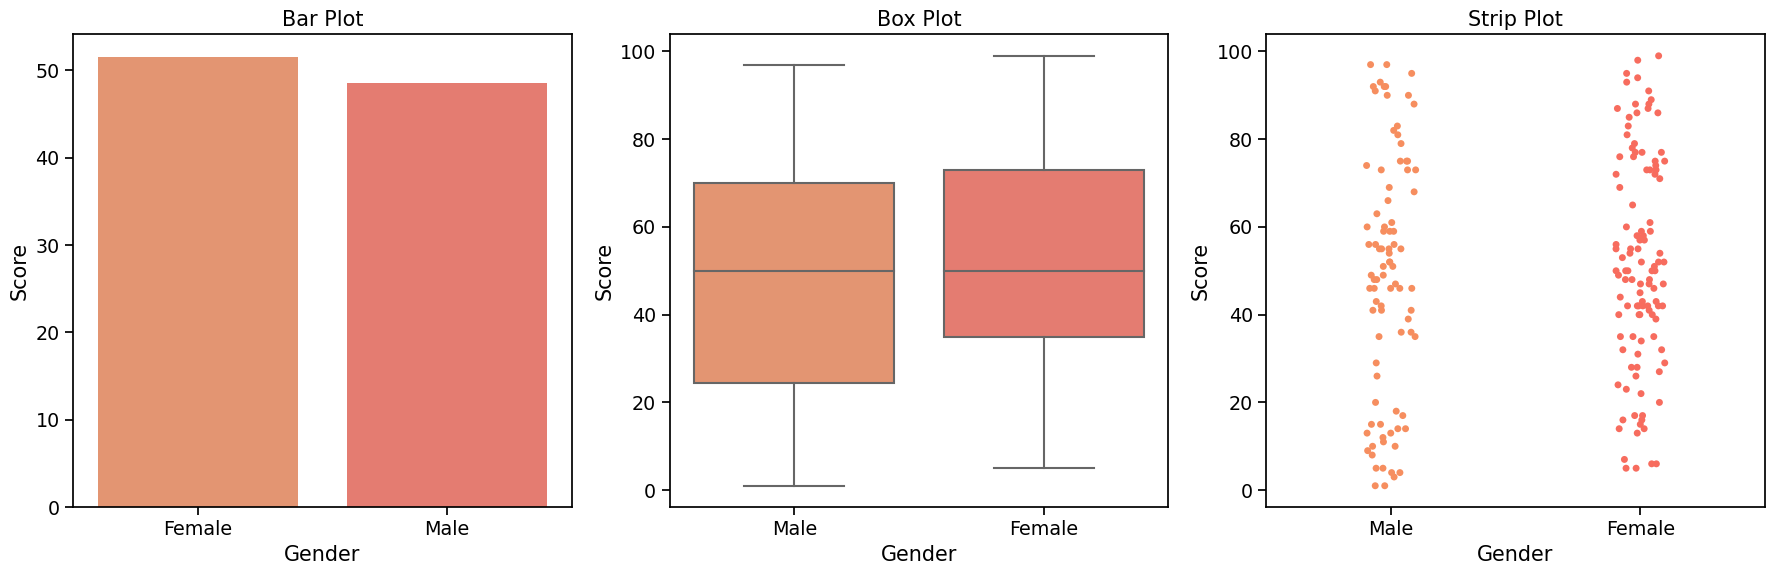

In [14]:
fig = plt.figure(figsize=(18, 6))
text = "<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#586ba4'> Gender and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
ax = plt.subplot(1,3,1)
temp = df.groupby('Gender')['Score'].mean().reset_index()
sns.barplot(data=temp, x='Gender', y='Score', palette=['#f68e5f', '#f76c5e']);
plt.title('Bar Plot', fontsize=15)

ax = plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='Score', palette=['#f68e5f', '#f76c5e']);
plt.title('Box Plot', fontsize=15)

ax = plt.subplot(1, 3, 3)
sns.stripplot(data=df, x='Gender', y='Score', palette=['#f68e5f', '#f76c5e']);
plt.title('Strip Plot', fontsize=15)

plt.tight_layout()
plt.show()

In [15]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### The above visuals strengthen our claim thar Gender has no impact on Spending Score.

## 2] Checking for Association between Gender and Annual Income.

### Starting the hypothesis:
###      H0: Gender and Annual Income are Indepedent.
###      H1: Annual Income depends on Gender

In [16]:
cont_table = pd.crosstab(df['Gender'], df['Annual_Income'])
_, p_value, _, _ = scipy.stats.chi2_contingency(cont_table, correction=True)
print(f'p-value for the test: {p_value: .4f}')

p-value for the test:  0.3495


In [17]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### Since the p-value > 0.05 we fail to reject the H0 hypothesis i.e. Annual Income is independent of Gender.

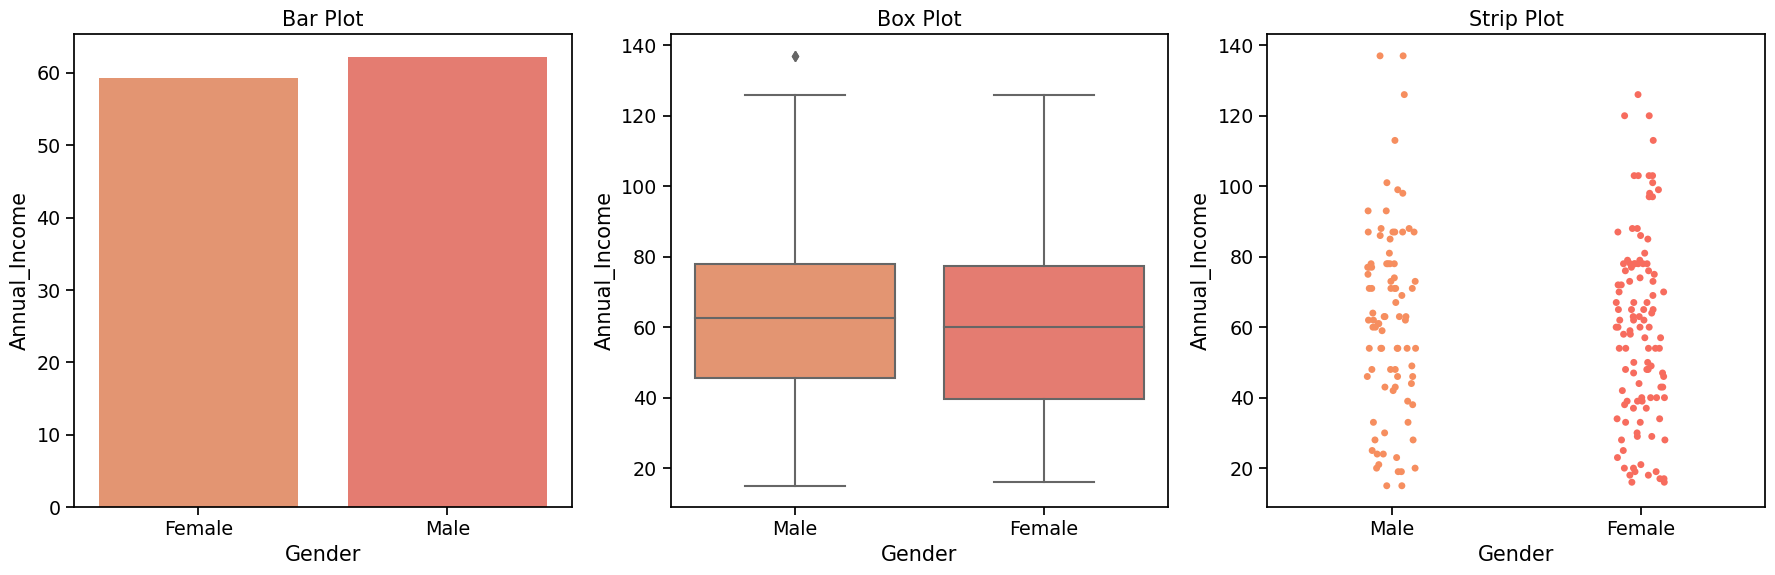

In [18]:
fig = plt.figure(figsize=(18, 6))
text = "<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#586ba4'> Gender and Annual Income"+ "</b></h3><hr></center>"
display(HTML(text))
ax = plt.subplot(1,3,1)
temp = df.groupby('Gender')['Annual_Income'].mean().reset_index()
sns.barplot(data=temp, x='Gender', y='Annual_Income', palette=['#f68e5f', '#f76c5e']);
plt.title('Bar Plot', fontsize=15)

ax = plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='Annual_Income', palette=['#f68e5f', '#f76c5e']);
plt.title('Box Plot', fontsize=15)

ax = plt.subplot(1, 3, 3)
sns.stripplot(data=df, x='Gender', y='Annual_Income', palette=['#f68e5f', '#f76c5e']);
plt.title('Strip Plot', fontsize=15)

plt.tight_layout()
plt.show()

In [19]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### The above visuals strengthen our claim that Gender has no impact on Annual Income.

## 3] Checking for Association between Annual Income and Score.

### Starting the hypothesis:
###      H0: The Annual Income and Score are not           correlated.
###      H1: The Annual Income ans Score are correlated.

In [20]:
p_value, _ = scipy.stats.pearsonr(df['Annual_Income'], df['Score'])
print(f'p-value for the test: {p_value: .4f}')

p-value for the test:  0.0099


In [21]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### Since the p-value < 0.05 we reject the H0 hypothesis i.e. Annual income and spending are correlated.

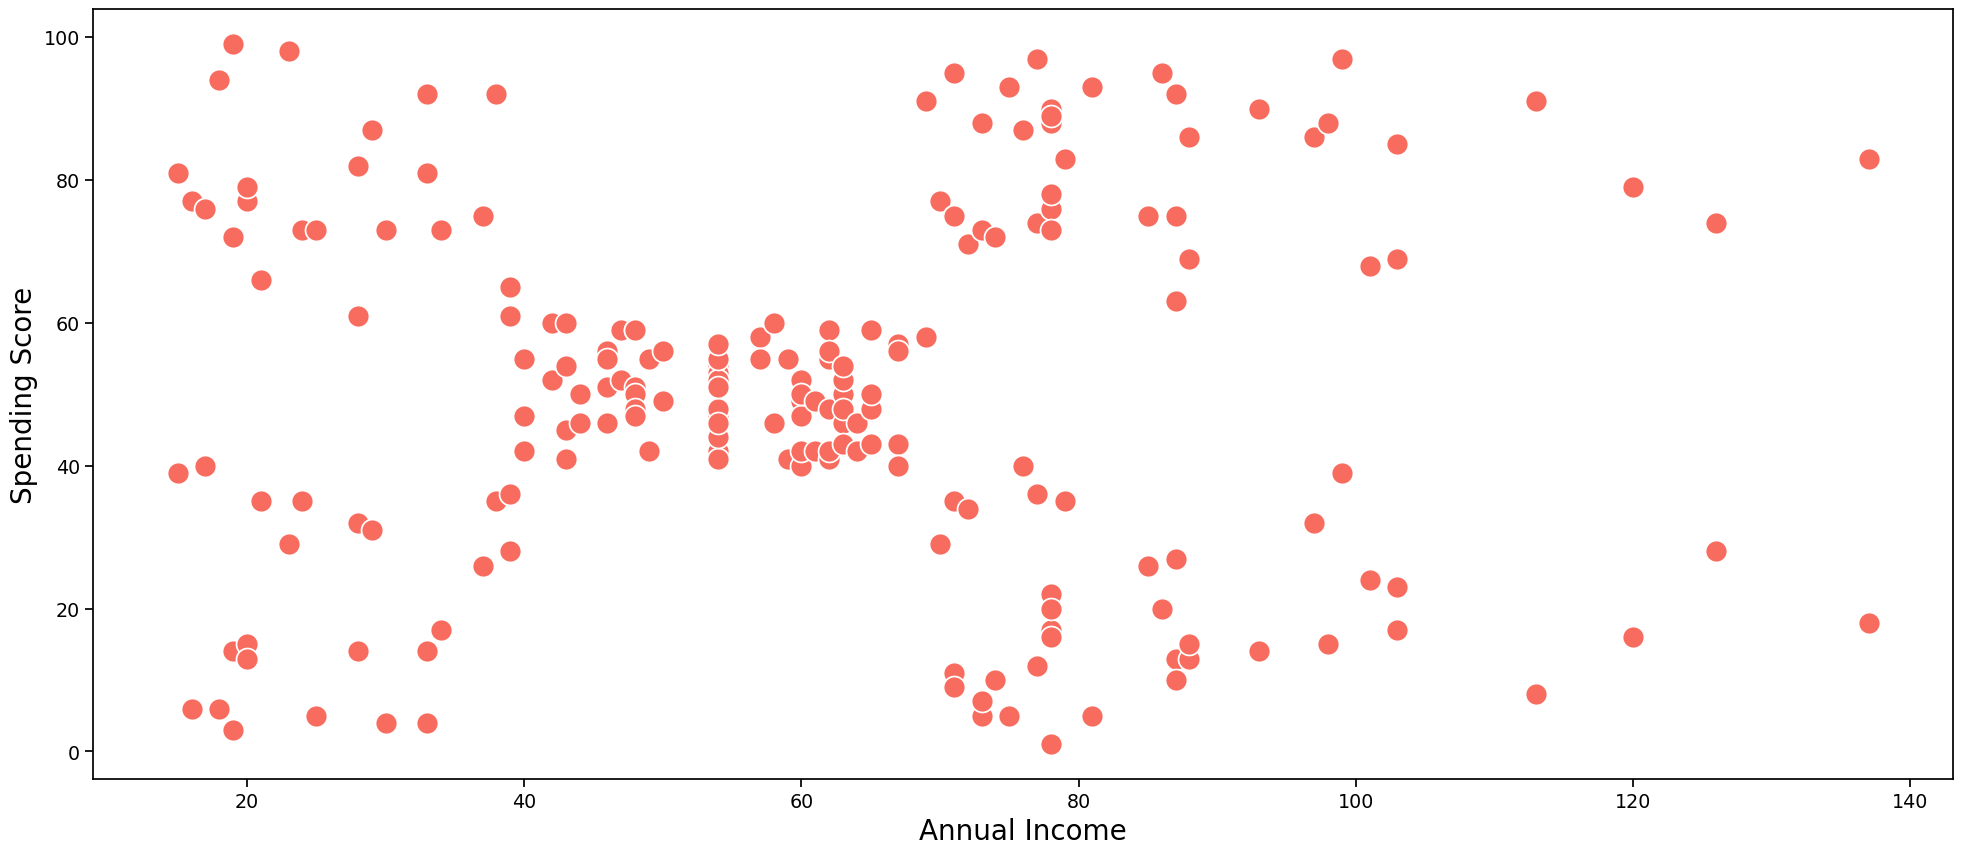

In [22]:
plt.figure(figsize=(24, 10))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#586ba4'> Annual_Income and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df, x='Annual_Income', y='Score', s=250, color='#f76c5e');
plt.xlabel('Annual Income', fontsize=20)
plt.ylabel('Spending Score', fontsize=20);

In [23]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### The above visual gives me the impression that there are small posive correlation between Annual Income and Spending Score.

In [24]:
bins = [0, 20, 40, 60, 80]
labels = np.arange(0, len(bins) - 1)
df['binned_Age'] = pd.cut(df['Age'], bins, labels=labels)

## 4] Checking the Association between Age(Binned) and Spending Score

### Starting the hypothesis:
###      H0: The mean core of all age groups is equal.
###      H1: At least one to mean Annual Income of Age groups differ.

In [25]:
# test for equality of variance
# h0:the variances are equal
# h1:the variances are not equal

_, p_value = scipy.stats.levene(df[df['binned_Age']==0]['Score'],
                               df[df['binned_Age']==1]['Score'],
                               df[df['binned_Age']==2]['Score'],
                               df[df['binned_Age']==3]['Score'],
                               center='mean')
print(f'p-value for the test: {p_value: .4f}')
# Since the p_value < 0.05 the variances are not equal.

p-value for the test:  0.0004


In [26]:
f_statistic, p_value = scipy.stats.f_oneway(df[df['binned_Age']==0]['Score'], 
                                            df[df['binned_Age']==1]['Score'], 
                                            df[df['binned_Age']==2]['Score'],
                                            df[df['binned_Age']==3]['Score'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.40059070488781, P-Value: 1.510354860990316e-11


In [27]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### Since the p_value < 0.05 we reject the null hypothesis i.e. atleast one of the mean of Age Groups Spending Acore differs.

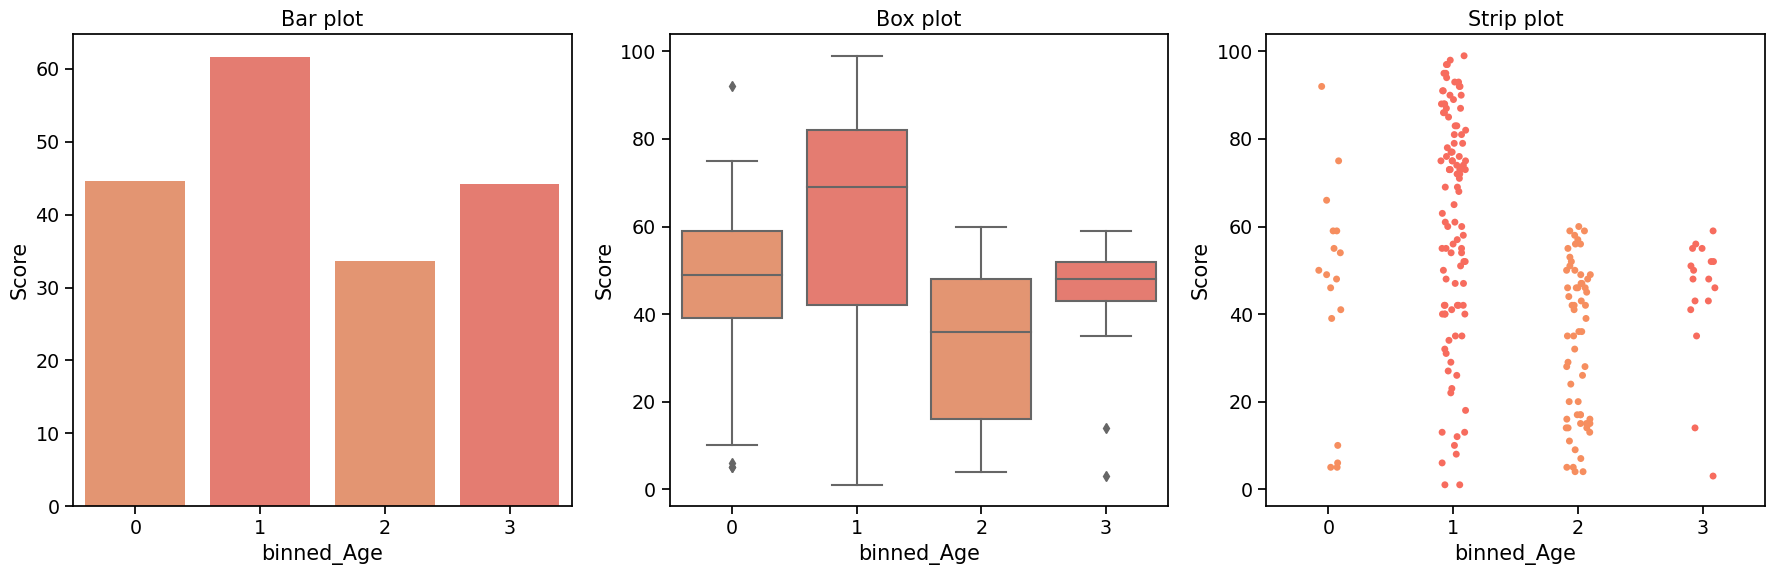

In [28]:
fig = plt.figure(figsize=(18, 6))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#586ba4'> Age(Binned) and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
ax = plt.subplot(1, 3, 1)
temp = df.groupby('binned_Age')['Score'].mean().reset_index()
sns.barplot(data=temp, x='binned_Age', y='Score', palette=['#f68e5f', '#f76c5e']);
plt.title('Bar plot', fontsize=15)

ax = plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='binned_Age', y='Score', palette=['#f68e5f', '#f76c5e']);
plt.title('Box plot', fontsize=15)

ax = plt.subplot(1, 3, 3)
sns.stripplot(data=df, x='binned_Age', y='Score', palette=['#f68e5f', '#f76c5e']);
plt.title('Strip plot', fontsize=15)

plt.tight_layout()
plt.show()

In [29]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### The above visuals strengthens our claim that Age groups mean Spending Score differ.

## 5] Checking the Association between Age(Binned) and Annual Income

### Starting the hypothesis:
###       H0: The mean Annual Income of all Groups is equal
###       H1: At least one to mean Annual Income of Age groups differ.

In [30]:
# test for equality of variance
# h0:the variances are equal
# h1:the variances are not equal

_,p_value=scipy.stats.levene(df[df['binned_Age']==0]['Annual_Income'],
                   df[df['binned_Age']==1]['Annual_Income'],
                   df[df['binned_Age']==2]['Annual_Income'],
                   df[df['binned_Age']==3]['Annual_Income'],center='mean')
print(f"p-value for the test:{p_value:.4f}")
# Since the p_value < 0.05 the variances are not equal.

p-value for the test:0.0029


In [31]:
f_statistic, p_value = scipy.stats.f_oneway(df[df['binned_Age']==0]['Score'], 
                                            df[df['binned_Age']==1]['Score'], 
                                            df[df['binned_Age']==2]['Score'],
                                            df[df['binned_Age']==3]['Score'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.40059070488781, P-Value: 1.510354860990316e-11


In [32]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### Since the p_value < 0.05 we reject the null hypothesis i.e. atleast one of the mean of Age Groups Annual Income differs.

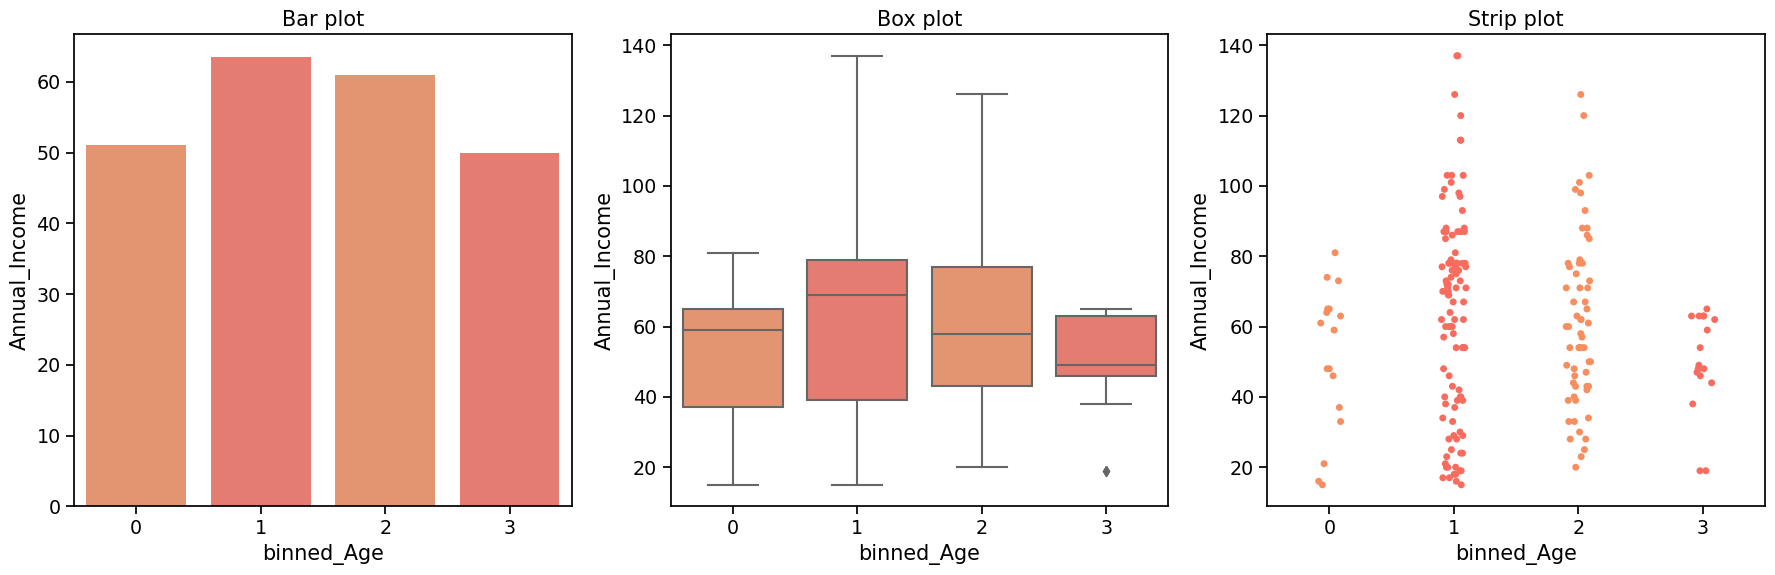

In [33]:
fig = plt.figure(figsize=(18, 6))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#586ba4'> Age(Binned) and Annual Income"+ "</b></h3><hr></center>"
display(HTML(text))
ax = plt.subplot(1, 3, 1)
temp = df.groupby('binned_Age')['Annual_Income'].mean().reset_index()
sns.barplot(data=temp, x='binned_Age', y='Annual_Income', palette=['#f68e5f', '#f76c5e']);
plt.title('Bar plot', fontsize=15)

ax = plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='binned_Age', y='Annual_Income', palette=['#f68e5f', '#f76c5e']);
plt.title('Box plot', fontsize=15)

ax = plt.subplot(1, 3, 3)
sns.stripplot(data=df, x='binned_Age', y='Annual_Income', palette=['#f68e5f', '#f76c5e']);
plt.title('Strip plot', fontsize=15)

plt.tight_layout()
plt.show()

In [34]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### The above visuals strengthens our claim that Age Groups mean Annual Income differs.

## Modelling - KMeans

In [35]:
X = df[['Annual_Income', 'Score', 'binned_Age']].values

### Gender is the least important feature here as per the statistical tests performed so I'm not considering it.

## Determining optimum value of K using Elbow Method

In [36]:
wcss = []
for i in range(1, 15):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=500)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


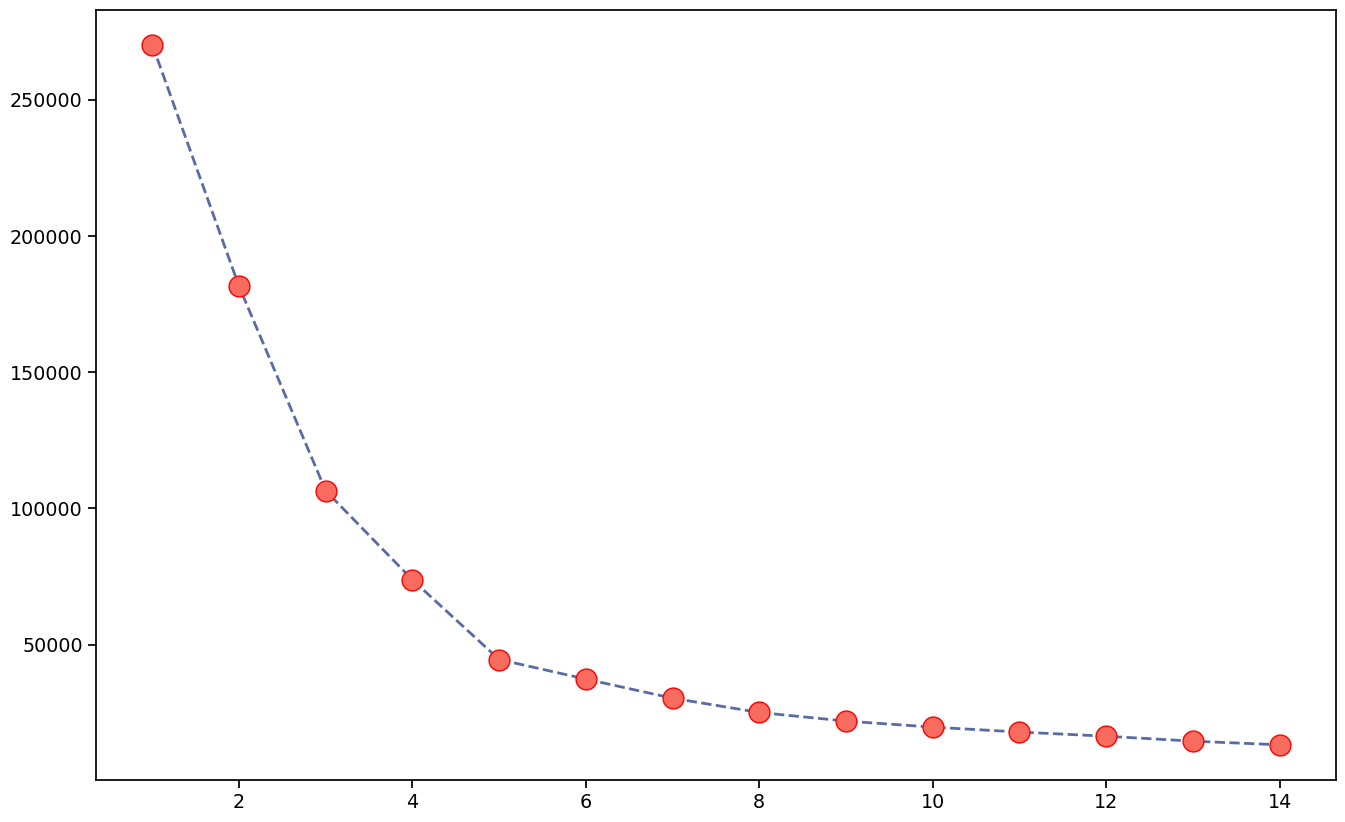

In [37]:
plt.figure(figsize=(16, 10))
plt.plot(np.arange(1, 15, 1), wcss, marker='o', ms=15, c='#586ba4',
        lw=2, mfc='#f76c5e', mec='r', linestyle='dashed');

In [38]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### We observe that after k=5 the inertia or basically mean sum of squared difference of each point in a cluster from its cluster center decreases at a lower rate.

### k=5 acts like the elbow and this value gives us a good balance number of clusters to form and inertia.

## K Means with k = 5

In [39]:
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=500)
y = k_means.fit_predict(X)

## Visualizing the Clusters in 3D

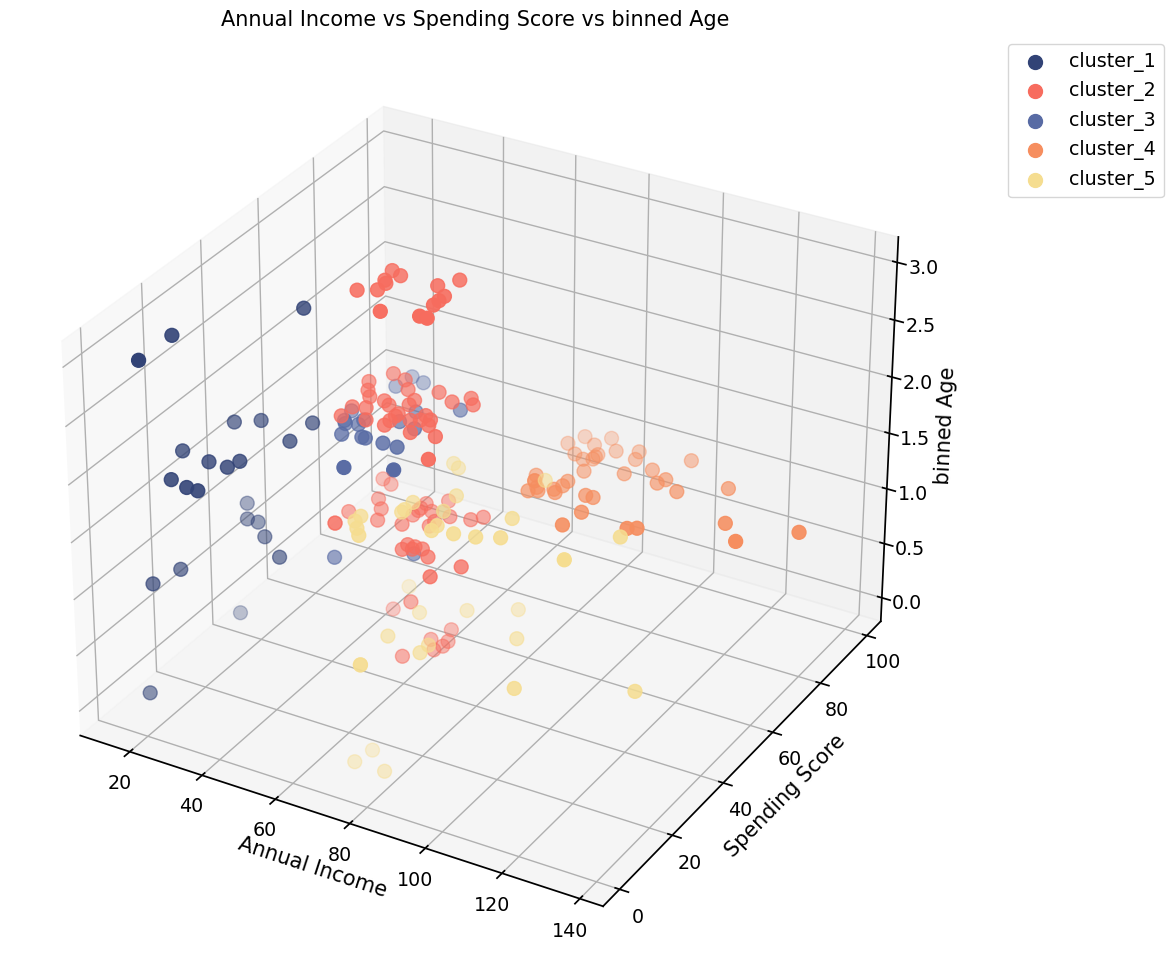

In [40]:
# %matplotlib widget
# sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("binned Age")
ax.set_title("Annual Income vs Spending Score vs binned Age")
ax.scatter(X[y==0,0],X[y==0,1],X[y==0,2],s=100,color='#324376',label='cluster_1')
ax.scatter(X[y==1,0],X[y==1,1],X[y==1,2],s=100,color='#f76c5e',label='cluster_2')
ax.scatter(X[y==2,0],X[y==2,1],X[y==2,2],s=100,color='#586ba4',label='cluster_3')
ax.scatter(X[y==3,0],X[y==3,1],X[y==3,2],s=100,color='#f68e5f',label='cluster_4')
ax.scatter(X[y==4,0],X[y==4,1],X[y==4,2],s=100,color='#f5dd90',label='cluster_5')
plt.legend(bbox_to_anchor=(1.25,1.0));
plt.tight_layout()
plt.show()

## Visualizing the clusters in 2D

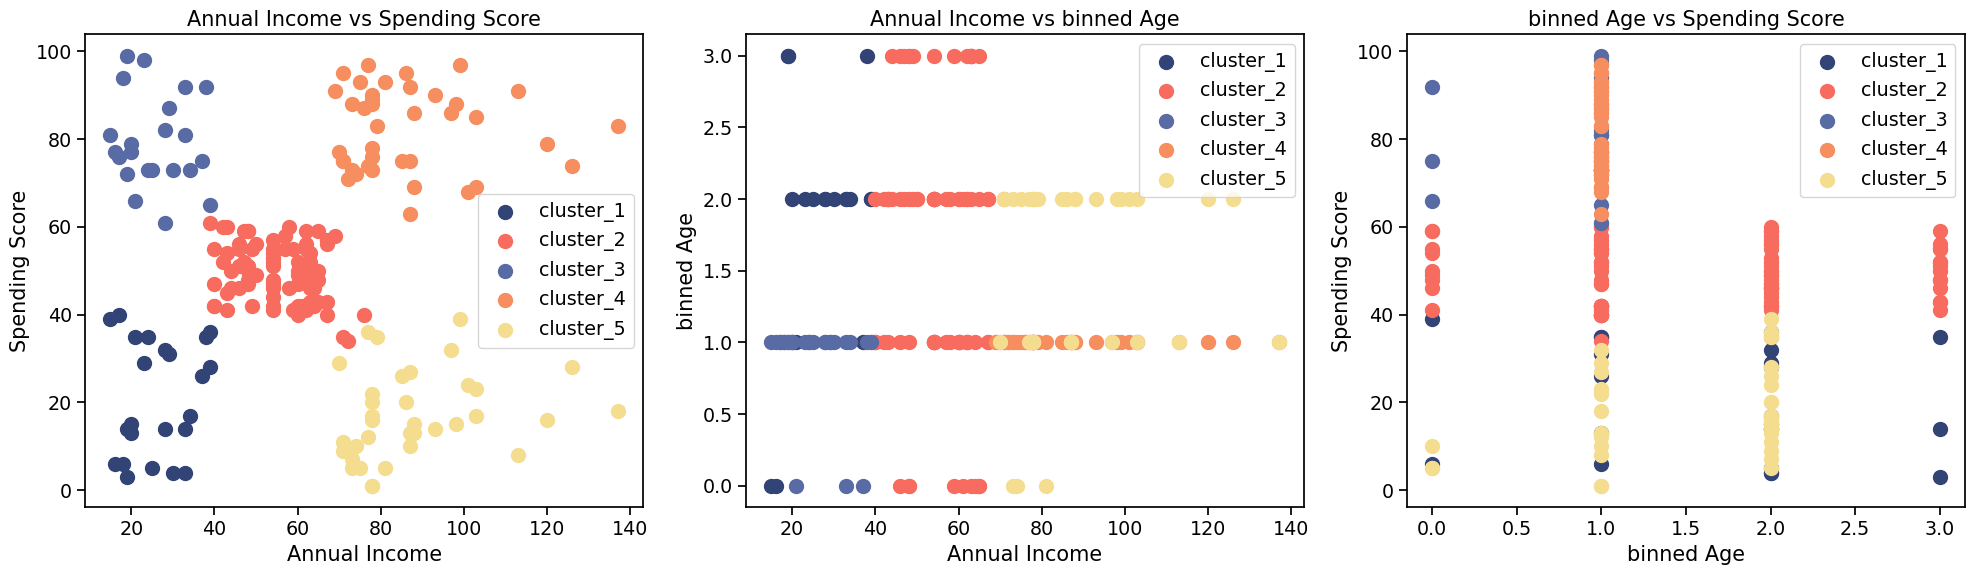

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(20,6))

def plot_2d(x1,y1,xlabel,ylabel,i):
    ax = plt.subplot(1,3,i)
    ax.set_xlabel(f"{xlabel}")
    ax.set_ylabel(f"{ylabel}")
    ax.set_title(f"{xlabel} vs {ylabel}")
    ax.scatter(X[y==0,x1],X[y==0,y1],s=100,color='#324376',label='cluster_1')
    ax.scatter(X[y==1,x1],X[y==1,y1],s=100,color='#f76c5e',label='cluster_2')
    ax.scatter(X[y==2,x1],X[y==2,y1],s=100,color='#586ba4',label='cluster_3')
    ax.scatter(X[y==3,x1],X[y==3,y1],s=100,color='#f68e5f',label='cluster_4')
    ax.scatter(X[y==4,x1],X[y==4,y1],s=100,color='#f5dd90',label='cluster_5')
    ax.legend()
    plt.tight_layout()
    
plot_2d(0,1,"Annual Income",'Spending Score',1)
plot_2d(0,2,"Annual Income",'binned Age',2)
plot_2d(2,1,"binned Age",'Spending Score',3)

In [42]:
display(HTML(f"<h3> <b style='color:#586ba4; font-size:22px'>Inference: </b></h3>"))

### We observe that Annual Income vs Spending plot gives the best representation of the clusters formed.

### The peach group includes the customers who although having lower Income tend to spend high percentage of it.


### Customers belonging to the blue, light blue and light pink tend to follow a linear relationship between Annual Income and Spend which is what we usually expect.


### The pink group represents the customers who although having Annual Income on the high side tend to spend less and this is the group that needs to be especially targeted with special policies so as to entice them to spend more.